## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

Load the appropriate libraries

In [121]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [122]:
#Read the data into a dataframe
df = pd.read_csv("data/goodreads.csv")

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
#display(df)
row0 = df.iloc[0]
row0
# row1 = df.iloc[1]
# row1
####### 

4.40                                                                                                                                                                                                                                                                                                  4.41
136455                                                                                                                                                                                                                                                                                               16648
0439023483                                                                                                                                                                                                                                                                                      0439358078
good_reads:book                                                                                        

Lets read the csv file with custom column descriptions specified in the problem statement.

In [123]:
df=pd.read_csv("data/goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])


#Examine the first couple of rows of the dataframe
####### 
df.head(2)
####### 

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [124]:
#Start by check the column data types
####### 
#   Insert your code
df.columns = ["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']
df.dtypes
####### 

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [125]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
print(df.shape)
print(df.columns)
print(len(df))
print("Index = ", df.index)
print("Dimension = ", df.ndim)
####### 

(6000, 10)
Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')
6000
Index =  RangeIndex(start=0, stop=6000, step=1)
Dimension =  2


Was the data read correctly and values represented as we expected?

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [126]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
print("Missing values of each columns are:")
print(np.sum(df.rating.isnull()))
print(np.sum(df.review_count.isnull()))
print(np.sum(df.isbn.isnull()))
print(np.sum([df.booktype.isnull()]))
print(np.sum([df.author_url.isnull()]))
print(np.sum([df.year.isnull()]))
print(np.sum([df.genre_urls.isnull()]))
print(np.sum([df.dir.isnull()]))
print(np.sum([df.rating_count.isnull()]))
print(np.sum([df.name.isnull()]))
####### Another way



missing = pd.DataFrame(df.isnull().sum(), columns = ["Number of missing values"])
missing

Missing values of each columns are:
2
0
475
0
0
7
62
0
0
0


,Number of missing values
rating,2
review_count,0
isbn,475
booktype,0
author_url,0
year,7
genre_urls,62
dir,0
rating_count,0
name,0


In [127]:
#Try to locate where the missing values occur
####### 
#   Insert your code
for col in df.columns:
  missCount = df[col].isnull().sum()
  print("There are ", missCount, " missing values in the column ", col)
  missing = pd.isnull(df[col]) # The array 'missing' contains true if the cell in the column is missing. Then it print missing cell with its
                               # corresponding rows
  # for i in range(3640, 3645):
  #   print(i, missing[i])
  display(df[missing])
  print()
####### 

There are  2  missing values in the column  rating


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None



There are  0  missing values in the column  review_count


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name



There are  475  missing values in the column  isbn


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
16,3.92,38061,NaN,good_reads:book,https://www.goodreads.com/author/show/498072.A...,2003.0,/genres/fiction|/genres/romance|/genres/fantas...,dir01/18619684-the-time-traveler-s-wife.html,927254,The Time Traveler's Wife
49,3.85,11628,NaN,good_reads:book,https://www.goodreads.com/author/show/5152.Vla...,1955.0,/genres/classics|/genres/fiction|/genres/liter...,dir01/7604.Lolita.html,374886,Lolita
85,4.16,14968,NaN,good_reads:book,https://www.goodreads.com/author/show/137902.R...,2007.0,/genres/young-adult|/genres/teen|/genres/young...,dir01/18660669-vampire-academy.html,297022,"Vampire Academy (Vampire Academy, #1)"
116,3.92,8393,NaN,good_reads:book,https://www.goodreads.com/author/show/957894.A...,1942.0,/genres/classics|/genres/fiction|/genres/philo...,dir02/49552.The_Stranger.html,307566,The Stranger
156,4.03,3473,NaN,good_reads:book,https://www.goodreads.com/author/show/4785.Ale...,1843.0,/genres/classics|/genres/fiction|/genres/histo...,dir02/7190.The_Three_Musketeers.html,156968,The Three Musketeers
...,...,...,...,...,...,...,...,...,...,...
5972,4.19,1670,NaN,good_reads:book,https://www.goodreads.com/author/show/4586597....,2011.0,/genres/romance|/genres/romance|/genres/contem...,dir60/12351649-perfection.html,35197,"Perfection (Neighbor from Hell, #2)"
5976,4.23,1185,NaN,good_reads:book,https://www.goodreads.com/author/show/5160667....,2014.0,/genres/romance|/genres/science-fiction|/genre...,dir60/20504754-transcendence.html,4942,Transcendence
5977,4.03,218,NaN,good_reads:book,https://www.goodreads.com/author/show/5769580....,1987.0,/genres/fiction|/genres/novels|/genres/literat...,dir60/5948927.html,1607,Ø§ÙØªÙÙ
5991,4.20,650,NaN,good_reads:book,https://www.goodreads.com/author/show/1112683._,2009.0,/genres/novels|/genres/fiction|/genres/religio...,dir60/6976667.html,2899,Ø£ÙÙØ§Ø­ ÙØ¯Ø³Ø±



There are  0  missing values in the column  booktype


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name



There are  0  missing values in the column  author_url


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name



There are  7  missing values in the column  year


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"



There are  62  missing values in the column  genre_urls


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
953,4.56,27,1477276068,good_reads:book,https://www.goodreads.com/author/show/6621980....,2012.0,NaN,dir10/16243767-crossing-the-seas.html,90,Crossing the Seas
1515,4.56,8,NaN,good_reads:book,https://www.goodreads.com/author/show/394525.T...,2013.0,NaN,dir16/18136407-crashing-down-to-earth.html,75,Crashing Down to Earth
1693,4.21,7,NaN,good_reads:book,https://www.goodreads.com/author/show/3110785._,2009.0,NaN,dir17/7425765.html,67,Ð¡Ð»ÑÐ½ÑÐµ Ð½ÐµÐ´Ð¾ÑÐµÐ³Ð°ÐµÐ¼Ð¾
1752,3.85,41,140921818X,good_reads:book,https://www.goodreads.com/author/show/7337562....,13.0,NaN,dir18/5548850-the-day-jesus-rode-into-croydon....,94,The Day Jesus Rode Into Croydon
1942,4.66,8,0992382009,good_reads:book,https://www.goodreads.com/author/show/7574275....,2014.0,NaN,dir20/19532388-letters-from-your-soul.html,29,Letters from your soul
...,...,...,...,...,...,...,...,...,...,...
5618,4.44,4,1495907791,good_reads:book,https://www.goodreads.com/author/show/7399883....,2014.0,NaN,dir57/20835408-the-afternoon-when-she-died.html,9,The Afternoon When She Died
5692,5.00,0,NaN,good_reads:book,https://www.goodreads.com/author/show/5989528....,2012.0,NaN,dir57/14288412-abstraction-in-theory---laws-of...,6,Abstraction In Theory - Laws Of Physical Trans...
5717,4.71,4,NaN,good_reads:book,https://www.goodreads.com/author/show/5838022....,2012.0,NaN,dir58/13741511-american-amaranth.html,14,American Amaranth
5729,4.83,16,NaN,good_reads:book,https://www.goodreads.com/author/show/7058502....,2014.0,NaN,dir58/22312293-the-keeper.html,29,"The Keeper (The Keeper, #5)"



There are  0  missing values in the column  dir


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name



There are  0  missing values in the column  rating_count


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name



There are  0  missing values in the column  name


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name


How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [128]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
df=pd.read_csv("data/goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

prev_size=len(df)
print("Prev size ", prev_size)

df = df.dropna()
new_size=len(df)
print('Rowd deleted:',prev_size-new_size)
df

####### 

Prev size  6000
Rowd deleted: 504


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
...,...,...,...,...,...,...,...,...,...,...
5994,4.37,28,0393062260,good_reads:book,https://www.goodreads.com/author/show/62157.Ro...,2007.0,/genres/poetry|/genres/religion|/genres/christ...,dir60/1251125.The_Book_of_Psalms.html,242,The Book of Psalms
5995,4.17,2226,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618,The River of Doubt
5996,3.99,775,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179,Shug
5997,3.78,540,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971,Flawed


Ok so we have done some cleaning. Is it enough? 

In [129]:
#Check the column data types again
####### 
#   Insert your code
df.dtypes
####### 

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [130]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
df.rating_count=df.rating_count.astype(int)
df.review_count=df.review_count.astype(int)
df.year=df.year.astype(int)
print(df.dtypes)
#######

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object


Final check

Some of the other colums that should be strings have NaN. 

In [131]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.
[5 min]

In [132]:
df1 = df.sort_values(by=['rating'], ascending=[False])
print(df1.loc[:, ['name', 'rating']])

                                                   name  rating
3712                                        Blade Heart    4.93
911                                  Honor and Polygamy    4.85
249                      The Complete Calvin and Hobbes    4.80
2630                   If I Should Die Before My Dog --    4.80
5657  Myrtle Mae and the Mirror in the Attic (The Ma...    4.80
...                                                 ...     ...
5064                                 Billy Budd, Sailor    3.03
5113                          The Jane Austen Book Club    3.01
5844                                         Mein Kampf    2.97
5979                                               Lost    2.77
3738               Revealing Eden (Save the Pearls, #1)    2.00

[5496 rows x 2 columns]


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [133]:
#Get the first author_url
test_string = df.author_url[0]
test_string

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [134]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
test_string = df.author_url[0]
print(test_string)
test_string = test_string.split('.')[-1]
print(test_string)
####### 

https://www.goodreads.com/author/show/153394.Suzanne_Collins
Suzanne_Collins


Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [135]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
def get_author(url):
    ####### 
    #   Insert your code
    name = test_string.split('.')[-1]
    ####### 
    return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
print(df.iloc[:5, :])

   rating  review_count        isbn         booktype                                         author_url  year                                         genre_urls                                                dir  rating_count                                               name           author
0    4.40        136455  0439023483  good_reads:book  https://www.goodreads.com/author/show/153394.S...  2008  /genres/young-adult|/genres/science-fiction|/g...                dir01/2767052-the-hunger-games.html       2958974            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins
1    4.41         16648  0439358078  good_reads:book  https://www.goodreads.com/author/show/1077326....  2003  /genres/fantasy|/genres/young-adult|/genres/fi...  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478  Harry Potter and the Order of the Phoenix (Har...  Suzanne_Collins
2    3.56         85746  0316015849  good_reads:book  https://www.goodreads.com/author/show/941441.S...  2005  /genres

In [136]:
#Examine some examples of genre_urls

#Test out some string operations to isolate the genre name
####### 
#   Insert your code
####### 

test_string = df.genre_urls[0]
print(test_string)
genres = test_string.split('|')
print(genres)

genre = ""
arr = []
for e in genres:
  genre = e.split('/')[-1]
  arr.append(genre)


for e in arr:
  print(e)

/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action
['/genres/young-adult', '/genres/science-fiction', '/genres/dystopia', '/genres/fantasy', '/genres/science-fiction', '/genres/romance', '/genres/adventure', '/genres/book-club', '/genres/young-adult', '/genres/teen', '/genres/apocalyptic', '/genres/post-apocalyptic', '/genres/action']
young-adult
science-fiction
dystopia
fantasy
science-fiction
romance
adventure
book-club
young-adult
teen
apocalyptic
post-apocalyptic
action


In [137]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
def split_and_join_genres(url):
    ####### 
    genres = url.split('|')
    genre = ''
    arr = []
    for e in genres:
      genre = e.split('/')[-1]
      arr.append(genre)
    #######
    return arr

df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,"[young-adult, science-fiction, dystopia, fanta..."
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,Suzanne_Collins,"[fantasy, young-adult, fiction, fantasy, magic..."
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Suzanne_Collins,"[young-adult, fantasy, romance, paranormal, va..."
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Suzanne_Collins,"[classics, fiction, historical-fiction, academ..."
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Suzanne_Collins,"[classics, fiction, romance, historical-fictio..."


---

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

Choose some columns to generate histograms.

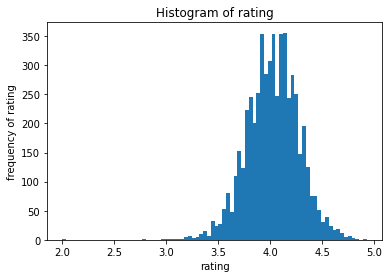

In [138]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

plt.xlabel("rating")
plt.ylabel("frequency of rating")
plt.title("Histogram of rating")
plt.hist(df['rating'], bins = 80)

plt.show()

If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize.


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

For example, we can determine the "best book" by year! Determine the best books in each year.

In [139]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
arr=list()
for year, subset in df.groupby('year'):
    #Find the best book of the year
    a=subset.sort_values(['rating','review_count'], ascending=[False,False])
    entry=list(a.iloc[0].values)
    arr.append(entry)


arr=pd.DataFrame(arr,columns=df.columns)
arr=arr.reindex(['year','name','rating', 'review_count', 'isbn', 'booktype', 'dir', 'rating_count', 'author', 'genres'], axis = 1)
display(arr)

try:
    del df['author_url']
    del df['genre_urls']
except:
    pass

,year,name,rating,review_count,isbn,booktype,dir,rating_count,author,genres
0,-1500,The Epic of Gilgamesh,3.60,1644,0141026286,good_reads:book,dir14/19351.The_Epic_of_Gilgamesh.html,42026,Suzanne_Collins,"[religion, literature, ancient, academic, read..."
1,-800,The Iliad/The Odyssey,4.01,365,0147712556,good_reads:book,dir03/1375.The_Iliad_The_Odyssey.html,35123,Suzanne_Collins,"[classics, fantasy, mythology, fantasy, academ..."
2,-560,Aesop's Fables,4.03,890,0192840509,good_reads:book,dir14/21348.Aesop_s_Fables.html,71259,Suzanne_Collins,"[classics, childrens, literature, fantasy, fai..."
3,-512,The Art of War,3.92,3559,1590302257,good_reads:book,dir07/10534.The_Art_of_War.html,114619,Suzanne_Collins,"[non-fiction, politics, classics, literature, ..."
4,-500,The Bhagavad Gita,4.06,1087,0140449183,good_reads:book,dir08/99944.The_Bhagavad_Gita.html,31634,Suzanne_Collins,"[classics, spirituality, religion, hinduism, f..."
...,...,...,...,...,...,...,...,...,...,...
285,2010,J. R. Ward Collection,4.72,104,178048044X,good_reads:book,dir60/10780042-j-r-ward-collection.html,1788,Suzanne_Collins,"[romance, paranormal, vampires, fantasy, paran..."
286,2011,Dare to Dream (100% Official),4.66,513,0007444397,good_reads:book,dir57/11792612-dare-to-dream.html,5572,Suzanne_Collins,"[non-fiction, biography]"
287,2012,If I Should Die Before My Dog --,4.80,46,1475124511,good_reads:book,dir27/16186085-if-i-should-die-before-my-dog--...,81,Suzanne_Collins,"[non-fiction, animals]"
288,2013,Blade Heart,4.93,7,1781843457,good_reads:book,dir38/18080358-blade-heart.html,15,Suzanne_Collins,"[fantasy, romance, suspense, adventure, romanc..."


In [140]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
arr = list()
for year, subset in df.groupby('year'):
  subset = subset.sort_values(['rating', 'review_count'], ascending=[False, False])
  entry = list(subset.iloc[0].values)
  arr.append(entry)

arr = pd.DataFrame(arr, columns=df.columns)
arr=arr.reindex(['year','name','rating', 'review_count', 'isbn', 'booktype', 'dir', 'rating_count', 'author', 'genres'], axis = 1)
display(arr)

try:
  del df['author_url']
  del df['genre_urls']
except:
  pass


,year,name,rating,review_count,isbn,booktype,dir,rating_count,author,genres
0,-1500,The Epic of Gilgamesh,3.60,1644,0141026286,good_reads:book,dir14/19351.The_Epic_of_Gilgamesh.html,42026,Suzanne_Collins,"[religion, literature, ancient, academic, read..."
1,-800,The Iliad/The Odyssey,4.01,365,0147712556,good_reads:book,dir03/1375.The_Iliad_The_Odyssey.html,35123,Suzanne_Collins,"[classics, fantasy, mythology, fantasy, academ..."
2,-560,Aesop's Fables,4.03,890,0192840509,good_reads:book,dir14/21348.Aesop_s_Fables.html,71259,Suzanne_Collins,"[classics, childrens, literature, fantasy, fai..."
3,-512,The Art of War,3.92,3559,1590302257,good_reads:book,dir07/10534.The_Art_of_War.html,114619,Suzanne_Collins,"[non-fiction, politics, classics, literature, ..."
4,-500,The Bhagavad Gita,4.06,1087,0140449183,good_reads:book,dir08/99944.The_Bhagavad_Gita.html,31634,Suzanne_Collins,"[classics, spirituality, religion, hinduism, f..."
...,...,...,...,...,...,...,...,...,...,...
285,2010,J. R. Ward Collection,4.72,104,178048044X,good_reads:book,dir60/10780042-j-r-ward-collection.html,1788,Suzanne_Collins,"[romance, paranormal, vampires, fantasy, paran..."
286,2011,Dare to Dream (100% Official),4.66,513,0007444397,good_reads:book,dir57/11792612-dare-to-dream.html,5572,Suzanne_Collins,"[non-fiction, biography]"
287,2012,If I Should Die Before My Dog --,4.80,46,1475124511,good_reads:book,dir27/16186085-if-i-should-die-before-my-dog--...,81,Suzanne_Collins,"[non-fiction, animals]"
288,2013,Blade Heart,4.93,7,1781843457,good_reads:book,dir38/18080358-blade-heart.html,15,Suzanne_Collins,"[fantasy, romance, suspense, adventure, romanc..."


Try this for few other definitions of the "best book" using `.groupby`.

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [141]:
genreBestBooks = {}

for _, row in df.iterrows():
  genres = row['genres']
  rating = row['rating']
  ratingCount = row['rating_count']

  for genre in genres:
    if genre not in genreBestBooks:
      genreBestBooks[genre] = row
    else:
      currentBest = genreBestBooks[genre]
      if rating > currentBest['rating'] or rating == currentBest['rating'] and ratingCount > currentBest['rating_count']:
        genreBestBooks[genre] = row

 
bestBooks_df = pd.DataFrame(data = genreBestBooks)
bestBooks_df = bestBooks_df.loc[['rating','review_count','year','rating_count','name','author']]
bestBooks_df = bestBooks_df.reindex(['name','author','year','rating','review_count','rating_count'])

display(bestBooks_df)


,young-adult,science-fiction,dystopia,fantasy,romance,adventure,book-club,teen,apocalyptic,post-apocalyptic,action,fiction,magic,childrens,science-fiction-fantasy,paranormal,vampires,paranormal-romance,supernatural,urban-fantasy,classics,historical-fiction,academic,school,literature,read-for-school,novels,high-school,european-literature,british-literature,classic-literature,adult,historical-romance,war,military-history,civil-war,christian,religion,picture-books,inspirational,philosophy,juvenile,short-stories,politics,humor,comedy,funny,cultural,japan,contemporary,...,love-inspired-historical,bulgarian-literature,bulgaria,finnish-literature,activism,mine,literary-criticism,christian-contemporary-fiction,textbooks,marvel,x-men,surreal,horse-racing,brain,dying-earth,post-colonial,classical-studies,superman,football,disability,bande-dessin%C3%A9e,esoterica,favorites,history-of-science,technical,science-fiction-romance,erotic-historical-romance,tasmania,cookbooks,basketball,culinary,epic-poetry,cults,society,komik,adolescence,holland,gaming,swashbuckling,food-history,fat,fat-acceptance,fat-studies,teachers,near-future,paganism,gothic-romance,splatterpunk,american-novels,scripture
name,"Harry Potter Boxset (Harry Potter, #1-7)","Words of Radiance (The Stormlight Archive, #2)","Hive (Species Intervention #6609, #4)",Blade Heart,Blade Heart,Blade Heart,"A Voice in the Wind (Mark of the Lion, #1)",The Divergent Series 2-Book Collection (Diverg...,The Dark Tower Series Collection,The Dark Tower Series Collection,"Warriors Boxed Set (Warriors, #1-3)",Honor and Polygamy,"Words of Radiance (The Stormlight Archive, #2)",The Complete Calvin and Hobbes,"Words of Radiance (The Stormlight Archive, #2)","Harry Potter Boxset (Harry Potter, #1-7)",J. R. Ward Collection,J. R. Ward Collection,Black Dagger Brotherhood,"The Absolute Sandman, Vol. 4",The Complete Calvin and Hobbes,Mark of the Lion Trilogy,The Fortress,The Fortress,"Checkmate (The Lymond Chronicles, #6)",Illuminations,"Harry Potter Boxset (Harry Potter, #1-7)","Hopeless (Hopeless, #1)","Checkmate (The Lymond Chronicles, #6)","Checkmate (The Lymond Chronicles, #6)",The Complete Novels,"Words of Radiance (The Stormlight Archive, #2)","Checkmate (The Lymond Chronicles, #6)",The Guardian of Secrets and Her Deathly Pact,The Civil War,The Civil War,ESV Study Bible,ESV Study Bible,The Hunger Games,Mark of the Lion Trilogy,ESV Study Bible,"The Enchantress Returns (The Land of Stories, #2)",Collected Fictions,The Civil War,The Complete Calvin and Hobbes,The Complete Calvin and Hobbes,Calvin and Hobbes,"Checkmate (The Lymond Chronicles, #6)",Death Note Box Set,"Touch & Geaux (Cut & Run, #7)",...,The Protector,Auto-da-FÃ©,Auto-da-FÃ©,The Unknown Soldier,Animal Liberation,Tracy's Tiger,A Lover's Discourse,"Reunion (Redemption, #5)",The Feynman Lectures on Physics,"Astonishing X-Men, Vol. 1","Astonishing X-Men, Vol. 1",A Season in Hell/The Drunken Boat,Horse Heaven,The Origin of Consciousness in the Breakdown o...,The Dancers at the End of Time (Eternal Champi...,The Wretched of the Earth,The Twelve Caesars,Superman,"The Perfect Play (Play by Play, #1)",The Running Dream,"Tintin in Tibet (Tintin, #20)",Beelzebub's Tales to His Grandson,"Siewca Wiatru (ZastÄpy Anielskie, #2)",The Structure of Scientific Revolutions,QED,"Born of Night (The League, #1)","Passion (Passion Quartet, #1)",English Passengers,The Joy of Cooking,My Losing Season,The Joy of Cooking,Shahnameh,Escape,Free to Choose,"Tintin in Tibet (Tintin, #20)","It Had to Be You (Gossip Girl, #0.5)",The Coffee Trader,Gamer Girl,Captain Blood,Nathaniel's Nutmeg,FAT!SO?,FAT!SO?,FAT!SO?,The Book Whisperer,Vurt,"The Fifth Sacred Thing (Maya Greenwood, #1)",Mistress of Mellyn,Off Season,The Memory of Old Jack,The Book of Psalms
author,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_Collins,Suzanne_

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [142]:
#Add a column for each genre
####### 
#   Insert your code
####### 
df.shape

(5496, 10)

Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

In [143]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
genreCount = {}

for _, row in df.iterrows():
  genres = row['genres']

  fgenres = set()
  for genre in genres:
    fgenres.add(genre)

  for genre in fgenres:
    if genre not in genreCount:
      genreCount[genre] = 1
    else:
      genreCount[genre] += 1

sorted_d = sorted(genreCount.items(), key=lambda x: x[1], reverse = True)

genreCount = {}
genreCount.update(sorted_d)
genreCount_df = pd.DataFrame(data = {"genre":genreCount.keys(),"count":genreCount.values()})
display(genreCount_df)

####### 

,genre,count
0,fiction,4194
1,fantasy,2581
2,young-adult,1953
3,romance,1941
4,literature,1561
...,...,...
524,paganism,1
525,gothic-romance,1
526,splatterpunk,1
527,american-novels,1


### Part 6.1: What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

There is a category called Paranormal Romance!!!!!

,year,rating
0,-800,3.68
1,-560,4.03
2,-458,3.96
3,-442,3.52
4,-431,3.80
...,...,...
237,2010,4.06
238,2011,3.36
239,2012,3.81
240,2013,4.07


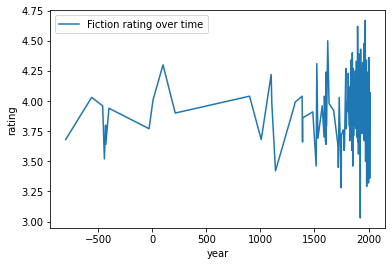

In [144]:
fiction = {}
for _, row in df.iterrows():
  genres = row['genres']
  rating = row['rating']
  year = row['year']

  for genre in genres:
    if genre == "fiction":
      fiction[year] = rating


sorted_d = sorted(fiction.items(), key=lambda x: x[0])
fiction = {}
fiction.update(sorted_d)

fiction_df = pd.DataFrame(data = {"year":fiction.keys(),"rating":fiction.values()})
display(fiction_df)

plt.xlabel("year")
plt.ylabel("rating")
plt.plot(list(fiction.keys()),list(fiction.values()),label = "Fiction rating over time")
plt.legend()
plt.show()